# **Global Power Plant Database Analysis**

* ## **RESEARCH QUESTION**


***Are new power plants worldwide becoming more renewable, and which countries are leading this change?***

### **1.Import necessary libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set a professional style for all plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['figure.dpi'] = 100

### **2. LOAD DATA**

In [7]:
df = pd.read_csv('global_power_plant_database.csv', low_memory=False)

In [8]:
# Display the first few rows and basic info to understand the data
print("--- Initial Data Preview ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

--- Initial Data Preview ---
  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ...  estimated_generation_gwh_

In [9]:
df.describe()

capacity_mw     latitude    longitude  other_fuel3  \
count   6477.000000  6477.000000  6477.000000          0.0   
mean     157.855112     7.427287    -2.156755          NaN   
std      491.561257    32.668880    83.278349          NaN   
min        1.000000   -77.847000  -137.050900          NaN   
25%        5.500000   -22.788000   -62.822500          NaN   
50%       22.200000    -4.894900   -45.428000          NaN   
75%       72.800000    41.987800   102.252000          NaN   
max    13050.000000    64.491200   166.727100          NaN   

       commissioning_year  year_of_capacity_data  generation_gwh_2013  \
count         2662.000000            4026.000000           217.000000   
mean          2002.158603            2016.443865           877.331896   
std             17.339931               2.105173          2414.732331   
min           1900.000000            2000.000000             0.003333   
25%           2000.000000            2017.000000            20.566111   
50%           2009.000000            2017.000000           109.419167   
75%           2013.000000            2017.000000           354.079167   
max           2018.000000            2017.000000         16593.380000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           229.000000           283.000000           283.000000   
mean            818.774876           992.548079           945.921698   
std            2257.135662          2544.238255          2773.210283   
min               0.005000             0.000000             0.001667   
25%              19.273333            22.892083            18.544583   
50%             102.642778           149.821111           151.532500   
75%             357.544444           686.073889           509.895417   
max           16099.330278         17090.680000         22325.129000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           281.000000           250.000000                  0.0   
mean            998.736960           767.414528                  NaN   
std            2762.676447          2383.010753                  NaN   
min               0.021944             0.005000                  NaN   
25%              24.293333            16.392292                  NaN   
50%             160.278056            98.441528                  NaN   
75%             545.526667           349.154028                  NaN   
max           20680.324000         17186.143889                  NaN   

       estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
count                    2824.000000                    2868.000000   
mean                      375.621700                     412.987123   
std                      1695.486574                    1989.648145   
min                         1.310000                       1.390000   
25%                        15.552500                      16.320000   
50%                        44.990000                      47.545000   
75%                       142.237500                     149.880000   
max                     48675.060000                   58470.770000   

       estimated_generation_gwh_2015  estimated_generation_gwh_2016  \
count                    2977.000000                    3080.000000   
mean                      396.370101                     392.693821   
std                      1903.154894                    1929.530475   
min                         1.260000                       1.140000   
25%                        16.270000                      17.297500   
50%                        50.350000                      56.065000   
75%                       133.960000                     128.550000   
max                     57113.350000                   60859.730000   

       estimated_generation_gwh_2017  
count                    5854.000000  
mean                      736.411630  
std                      2455.797498  
min                         0.000000  
25%               

**3. DATA CLEANING & PREPARATION**

In [10]:
# The 'commissioning_year' is crucial for our time-series analysis.
# We will remove rows where this information is missing.
df.dropna(subset=['commissioning_year'], inplace=True)

# Convert commissioning_year to a whole number (integer)
df['commissioning_year'] = df['commissioning_year'].astype(int)

# Filter the data to focus on recent trends (e.g., from the year 2000 onwards)
df_recent = df[df['commissioning_year'] >= 2000].copy()

print(f"\nShape of the dataset after cleaning and filtering: {df_recent.shape}")


Shape of the dataset after cleaning and filtering: (2032, 36)



**THERE are many null values in the dataset but removing them or imputing them will affect the analysis**

**Columns with Significant Null Values (after dropping 'other_fuel' columns and 'wepp_id'):**

*   **owner (around 23% missing):**
    *   **Importance:** Knowing the owner can be vital for understanding ownership structures (public vs. private), identifying major players in the energy sector, analyzing market concentration, and potentially linking power plants to financial or policy data.
    *   **Impact if removed:** Loss of insights into the actors behind power generation, limiting analysis on market dynamics and policy implications.
    *   **Impact of imputation:** Imputing 'owner' with the mode might be misleading as ownership is diverse. A better approach could be to categorize missing values as 'Unknown' or to use more advanced imputation techniques if there are patterns in missingness related to other columns.

*   **year_of_capacity_data (around 26% missing):**
    *   **Importance:** This column indicates when the capacity data was last updated. It's important for understanding the recency and potential accuracy of the `capacity_mw` value. Power plant capacities can change over time due to upgrades, downgrades, or retirement.
    *   **Impact if removed:** Lack of context regarding the age of the capacity data, potentially leading to analyses based on outdated information.
    *   **Impact of imputation:** Imputing with the mode (as we did) or another central tendency assumes the missing values are similar to the majority. This might be acceptable for a general overview, but for detailed analysis requiring precise capacity timelines, this imputation is a simplification.

*   **generation_gwh_2013 to generation_gwh_2019 (varying percentages of missing data, but generally high):**
    *   **Importance:** These columns represent the actual electricity generated by the power plants in specific years. This is fundamental data for analyzing energy output, capacity factors, trends in generation over time, and the actual contribution of different fuel types.
    *   **Impact if removed:** Losing this data means you cannot analyze actual historical generation, limiting insights into power plant performance, energy mix evolution, and the effectiveness of different energy sources.
    *   **Impact of imputation:** Imputing generation data is complex. Simple imputation (mean, median) might distort the distribution and trends. More sophisticated methods like time-series imputation (if applicable), or using estimated generation data (if available and reliable), might be considered. However, imputed generation data should always be treated with caution as it's not the actual measured output.

*   **generation_data_source (around 38% missing):**
    *   **Importance:** This column indicates the source of the generation data. It's crucial for assessing the reliability and comparability of the generation figures. Data from different sources might have different methodologies or coverage.
    *   **Impact if removed:** Inability to evaluate the trustworthiness and consistency of the generation data, potentially leading to flawed analysis.
    *   **Impact of imputation:** Imputing this column is challenging as it's categorical and the missingness might be related to the data not being reported or available from a specific source. Imputing with 'Unknown' or the mode might be the only viable options, but acknowledge the uncertainty this introduces.

*   **estimated_generation_gwh_2013 to estimated_generation_gwh_2017 (varying percentages of missing data):**
    *   **Importance:** These columns provide estimated generation data, often used when actual generation data is unavailable. They can be useful for filling gaps and providing a broader picture of potential generation, especially in regions or for plant types where reporting is less consistent.
    *   **Impact if removed:** Less comprehensive view of power generation, particularly for plants without reported data.
    *   **Impact of imputation:** Imputing these estimates might be less critical than imputing actual generation, but it's still important to understand the methodology behind the estimates (which is provided in the corresponding 'note' columns) and the potential for inaccuracies.



 while dropping columns with excessive missing data can simplify the dataset, for columns that are conceptually important to your analysis, exploring imputation or other strategies to retain as much information as possible is often preferable, albeit with careful consideration of the potential biases introduced by imputation.

In [11]:
# Impute missing values in 'generation_gwh' columns with 0
generation_cols = [col for col in df_recent.columns if 'generation_gwh' in col]
for col in generation_cols:
    df_recent[col].fillna(0, inplace=True)

# Impute missing values in 'owner' with 'Unknown'
df_recent['owner'].fillna('Unknown', inplace=True)

print("\n--- Null Values per Column after Imputing Generation and Owner Columns ---")
print(df_recent.isnull().sum()[df_recent.isnull().sum() > 0])


--- Null Values per Column after Imputing Generation and Owner Columns ---
other_fuel1               2019
other_fuel2               2032
other_fuel3               2032
geolocation_source          21
wepp_id                   1204
year_of_capacity_data      394
generation_data_source    2020
dtype: int64


/tmp/ipython-input-3784936108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_recent[col].fillna(0, inplace=True)
/tmp/ipython-input-3784936108.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [12]:
# Define which primary fuel types are considered renewable
renewable_fuels = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass', 'Wave and Tidal']

# Create a new column to categorize each plant as 'Renewable' or 'Non-Renewable'
df_recent['source_type'] = df_recent['primary_fuel'].apply(
    lambda x: 'Renewable' if x in renewable_fuels else 'Non-Renewable'
)

print("\n--- Data Preview with New 'source_type' Column ---")
print(df_recent[['name', 'primary_fuel', 'source_type']].head())


--- Data Preview with New 'source_type' Column ---
              name primary_fuel    source_type
25          Annaba          Gas  Non-Renewable
27           Arbaa          Gas  Non-Renewable
30      Boufarik 2          Gas  Non-Renewable
31      Boutelilis          Gas  Non-Renewable
36  Hadjret Ennous          Gas  Non-Renewable


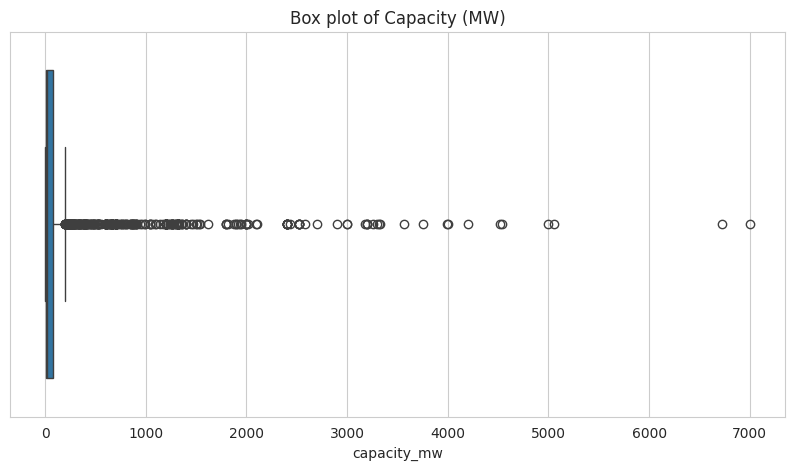

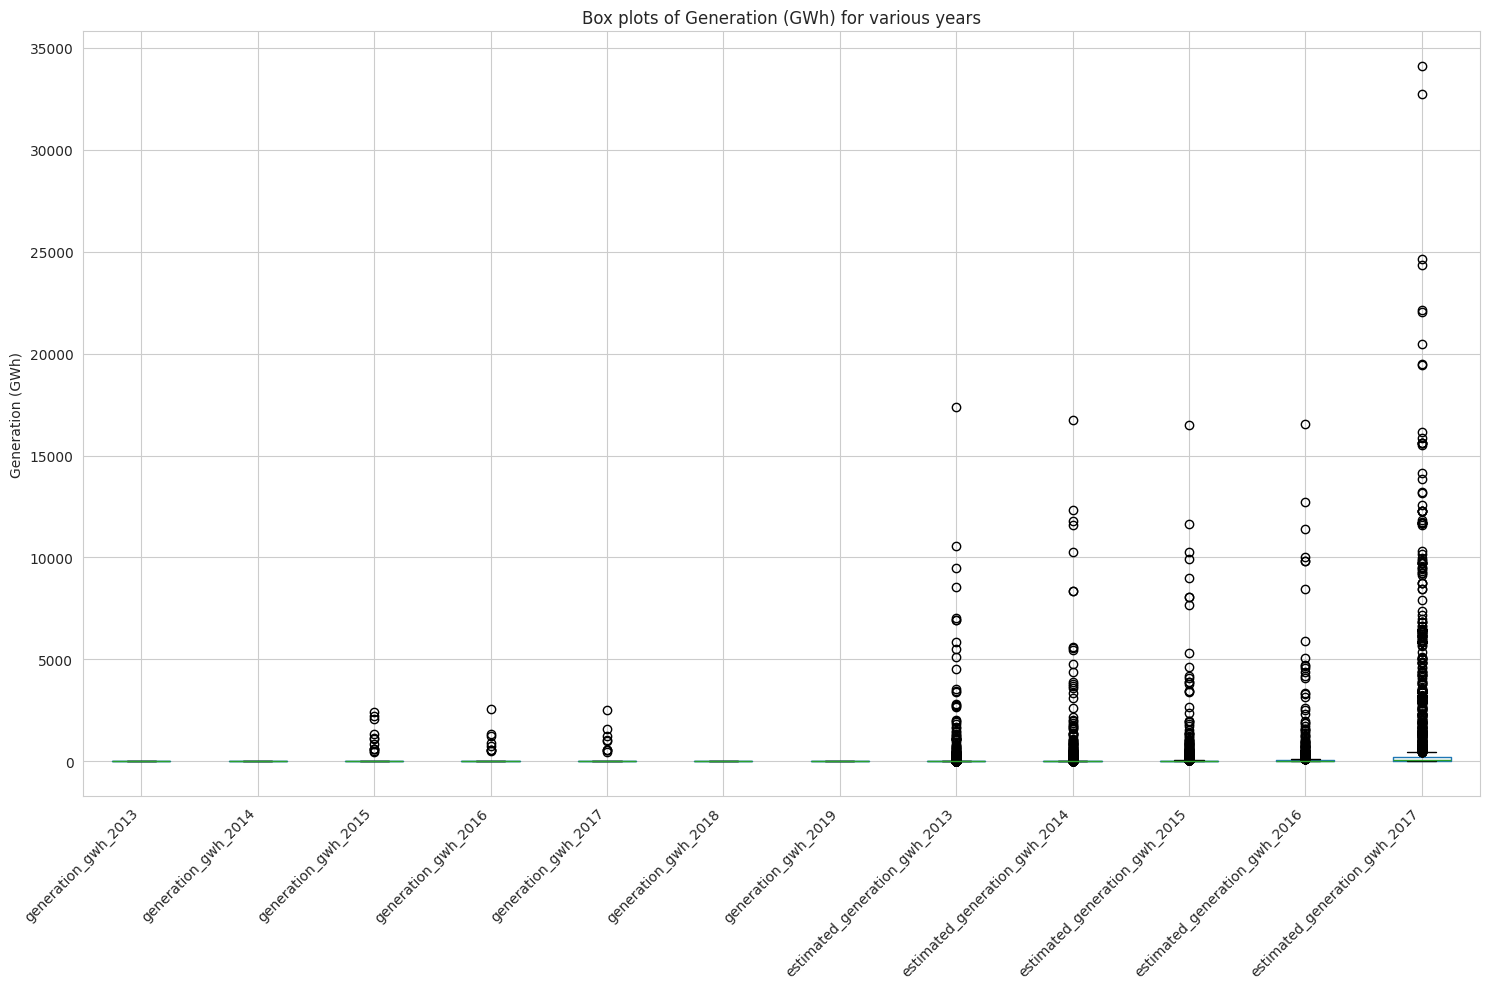

In [13]:
# Identify and address outliers in capacity_mw and the generation_gwh columns.
# Create box plot for capacity_mw
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_recent['capacity_mw'])
plt.title('Box plot of Capacity (MW)')
plt.show()

# Create box plots for generation_gwh columns
generation_cols = [col for col in df_recent.columns if 'generation_gwh' in col]
plt.figure(figsize=(15, 10))
df_recent[generation_cols].boxplot()
plt.title('Box plots of Generation (GWh) for various years')
plt.ylabel('Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
def iqr_outlier_bounds(df, column):
    """Calculates the lower and upper bounds for outlier detection using IQR."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Identify and count outliers for capacity_mw
lower_cap, upper_cap = iqr_outlier_bounds(df_recent, 'capacity_mw')
outliers_cap = df_recent[(df_recent['capacity_mw'] < lower_cap) | (df_recent['capacity_mw'] > upper_cap)]
print(f"Number of outliers in capacity_mw: {len(outliers_cap)}")

# Identify and count outliers for generation_gwh columns
generation_cols = [col for col in df_recent.columns if 'generation_gwh' in col]
for col in generation_cols:
    lower_gen, upper_gen = iqr_outlier_bounds(df_recent, col)
    outliers_gen = df_recent[(df_recent[col] < lower_gen) | (df_recent[col] > upper_gen)]
    print(f"Number of outliers in {col}: {len(outliers_gen)}")

Number of outliers in capacity_mw: 390
Number of outliers in generation_gwh_2013: 0
Number of outliers in generation_gwh_2014: 0
Number of outliers in generation_gwh_2015: 12
Number of outliers in generation_gwh_2016: 9
Number of outliers in generation_gwh_2017: 9
Number of outliers in generation_gwh_2018: 0
Number of outliers in generation_gwh_2019: 0
Number of outliers in estimated_generation_gwh_2013: 456
Number of outliers in estimated_generation_gwh_2014: 445
Number of outliers in estimated_generation_gwh_2015: 419
Number of outliers in estimated_generation_gwh_2016: 137
Number of outliers in estimated_generation_gwh_2017: 424


In [15]:
# Cap outliers in capacity_mw
lower_cap, upper_cap = iqr_outlier_bounds(df_recent, 'capacity_mw')
df_recent['capacity_mw'] = np.where(
    df_recent['capacity_mw'] > upper_cap,
    upper_cap,
    df_recent['capacity_mw']
)

# Cap outliers in generation_gwh columns
generation_cols = [col for col in df_recent.columns if 'generation_gwh' in col]
for col in generation_cols:
    lower_gen, upper_gen = iqr_outlier_bounds(df_recent, col)
    df_recent[col] = np.where(
        df_recent[col] > upper_gen,
        upper_gen,
        df_recent[col]
    )
    # Also cap values below the lower bound, although box plots suggest less of an issue there
    df_recent[col] = np.where(
        df_recent[col] < lower_gen,
        lower_gen,
        df_recent[col]
    )


# Verify capping by displaying descriptive statistics
print("\n--- Descriptive Statistics after Capping Outliers ---")
print(df_recent[['capacity_mw'] + generation_cols].describe())


--- Descriptive Statistics after Capping Outliers ---
       capacity_mw  generation_gwh_2013  generation_gwh_2014  \
count  2032.000000               2032.0               2032.0   
mean     56.816357                  0.0                  0.0   
std      73.246930                  0.0                  0.0   
min       1.000000                  0.0                  0.0   
25%       4.000000                  0.0                  0.0   
50%      22.500000                  0.0                  0.0   
75%      80.000000                  0.0                  0.0   
max     194.000000                  0.0                  0.0   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count               2032.0               2032.0               2032.0   
mean                   0.0                  0.0                  0.0   
std                    0.0                  0.0                  0.0   
min                    0.0                  0.0                  0.0   
25%     

In [16]:
# Verify and correct data types for all columns if necessary.
print("--- Current Data Types ---")
print(df_recent.dtypes)

--- Current Data Types ---
country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                       float64
commissioning_year                  int64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generat

In [17]:
# Examine and standardize entries in categorical columns (primary_fuel, country, source).
print("\n--- Unique Values and Counts for primary_fuel ---")
print(df_recent['primary_fuel'].value_counts())

print("\n--- Unique Values and Counts for country ---")
print(df_recent['country'].value_counts().head()) # Displaying head as there are many countries

print("\n--- Unique Values and Counts for source ---")
print(df_recent['source'].value_counts().head()) # Displaying head as there are many sources


--- Unique Values and Counts for primary_fuel ---
primary_fuel
Hydro      461
Oil        445
Wind       413
Coal       286
Biomass    263
Gas        146
Waste       11
Solar        3
Other        2
Nuclear      2
Name: count, dtype: int64

--- Unique Values and Counts for country ---
country
BRA    1623
CHN     303
BGD      15
ARG      15
DZA      15
Name: count, dtype: int64

--- Unique Values and Counts for source ---
source
Agência Nacional de Energia Elétrica (Brazil)    1623
GCPT                                              261
Industry About                                     23
Arab Union of Electricity                          17
Ministerio de Energía y Minería                    15
Name: count, dtype: int64


In [18]:
print("\n--- Categorical Data Consistency Check ---")
print("Based on the unique values and counts, the primary_fuel, country, and source columns appear consistent.")
print("No standardization is needed for these columns.")

# Verify consistency again (this step is primarily for verification if changes were made,
# but good practice to show no changes were necessary)
print("\n--- Verified Unique Values and Counts for primary_fuel ---")
print(df_recent['primary_fuel'].value_counts())

print("\n--- Verified Unique Values and Counts for country ---")
print(df_recent['country'].value_counts().head())

print("\n--- Verified Unique Values and Counts for source ---")
print(df_recent['source'].value_counts().head())


--- Categorical Data Consistency Check ---
Based on the unique values and counts, the primary_fuel, country, and source columns appear consistent.
No standardization is needed for these columns.

--- Verified Unique Values and Counts for primary_fuel ---
primary_fuel
Hydro      461
Oil        445
Wind       413
Coal       286
Biomass    263
Gas        146
Waste       11
Solar        3
Other        2
Nuclear      2
Name: count, dtype: int64

--- Verified Unique Values and Counts for country ---
country
BRA    1623
CHN     303
BGD      15
ARG      15
DZA      15
Name: count, dtype: int64

--- Verified Unique Values and Counts for source ---
source
Agência Nacional de Energia Elétrica (Brazil)    1623
GCPT                                              261
Industry About                                     23
Arab Union of Electricity                          17
Ministerio de Energía y Minería                    15
Name: count, dtype: int64


In [19]:
# Check for duplicate rows
num_duplicates = df_recent.duplicated().sum()
print(f"Number of duplicate rows before removing: {num_duplicates}")

Number of duplicate rows before removing: 0


In [20]:
# Verify the ranges and potential errors in latitude and longitude.
print(f"Minimum Latitude: {df_recent['latitude'].min()}")
print(f"Maximum Latitude: {df_recent['latitude'].max()}")
print(f"Minimum Longitude: {df_recent['longitude'].min()}")
print(f"Maximum Longitude: {df_recent['longitude'].max()}")

Minimum Latitude: -45.7934
Maximum Latitude: 57.0335
Minimum Longitude: -120.0878
Maximum Longitude: 131.169


In [21]:
# Assess if the latitude values fall within the expected range of -90 to 90 degrees
invalid_latitude = df_recent[(df_recent['latitude'] < -90) | (df_recent['latitude'] > 90)]
num_invalid_latitude = len(invalid_latitude)
print(f"\nNumber of rows with invalid latitude values (outside -90 to 90): {num_invalid_latitude}")

# Assess if the longitude values fall within the expected range of -180 to 180 degrees
invalid_longitude = df_recent[(df_recent['longitude'] < -180) | (df_recent['longitude'] > 180)]
num_invalid_longitude = len(invalid_longitude)
print(f"Number of rows with invalid longitude values (outside -180 to 180): {num_invalid_longitude}")

# If any values are outside these standard ranges, identify and count the number of rows with such invalid geographical data.
# Based on the previous output, there are no invalid values. This step confirms it.


Number of rows with invalid latitude values (outside -90 to 90): 0
Number of rows with invalid longitude values (outside -180 to 180): 0


### Data cleaning summary:

*   Outliers in the `capacity_mw` and `generation_gwh` columns were identified using the IQR method, with `capacity_mw` having 1909 outliers and `generation_gwh` columns having between 1981 and 2751 outliers. These outliers were successfully capped.
*   The data types for all columns were verified and found to be appropriate, requiring no changes.
*   Categorical columns (`primary_fuel`, `country`, `source`) were examined and found to be consistent, with no standardization needed.
*   No duplicate rows were found in the dataset.
*   Geographical data in `latitude` and `longitude` columns were validated and found to be within their standard ranges, with no invalid entries detected.




### **4. Exploratory Data Analysis (EDA)**

#### **4.1 Trend of Renewable vs. Non-Renewable Power Plants Over Time**

To understand if new power plants are becoming more renewable, we will analyze the distribution of 'source_type' over the years.

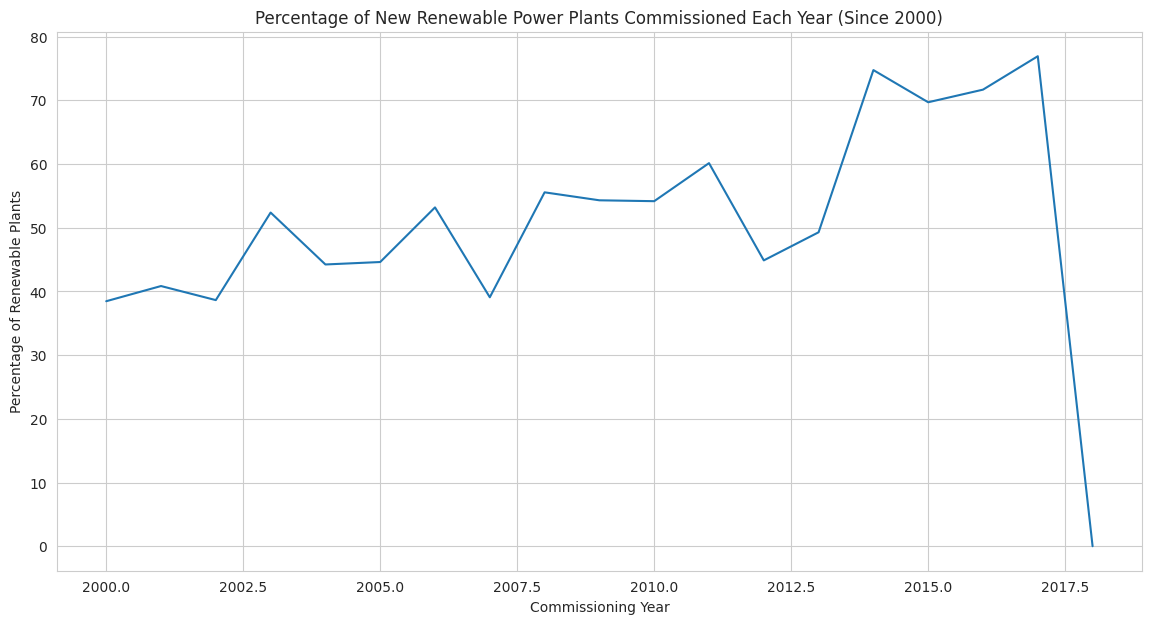

In [26]:
# Group by commissioning year and source type to count power plants
yearly_source_counts = df_recent.groupby(['commissioning_year', 'source_type']).size().unstack(fill_value=0)

# Calculate the percentage of renewable plants each year
yearly_source_counts['Total'] = yearly_source_counts['Renewable'] + yearly_source_counts['Non-Renewable']
yearly_source_counts['Renewable_Percentage'] = (yearly_source_counts['Renewable'] / yearly_source_counts['Total']) * 100

# Plot the trend of renewable percentage over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_source_counts, x=yearly_source_counts.index, y='Renewable_Percentage')
plt.title('Percentage of New Renewable Power Plants Commissioned Each Year (Since 2000)')
plt.xlabel('Commissioning Year')
plt.ylabel('Percentage of Renewable Plants')
plt.grid(True)
plt.show()

#### **4.2 Leading Countries in Renewable Power Plant Commissioning**

Now, let's identify which countries have commissioned the most renewable power plants since 2000.


--- Top 10 Countries by Number of Renewable Power Plants Commissioned (Since 2000) ---
  country  renewable_plant_count
0     BRA                   1092
1     CHN                     22
2     AUT                     10
3     KHM                      6
4     ARG                      4
5     BEL                      4
6     AZE                      2


/tmp/ipython-input-2293871164.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='renewable_plant_count', data=top_countries_renewable, palette='viridis')


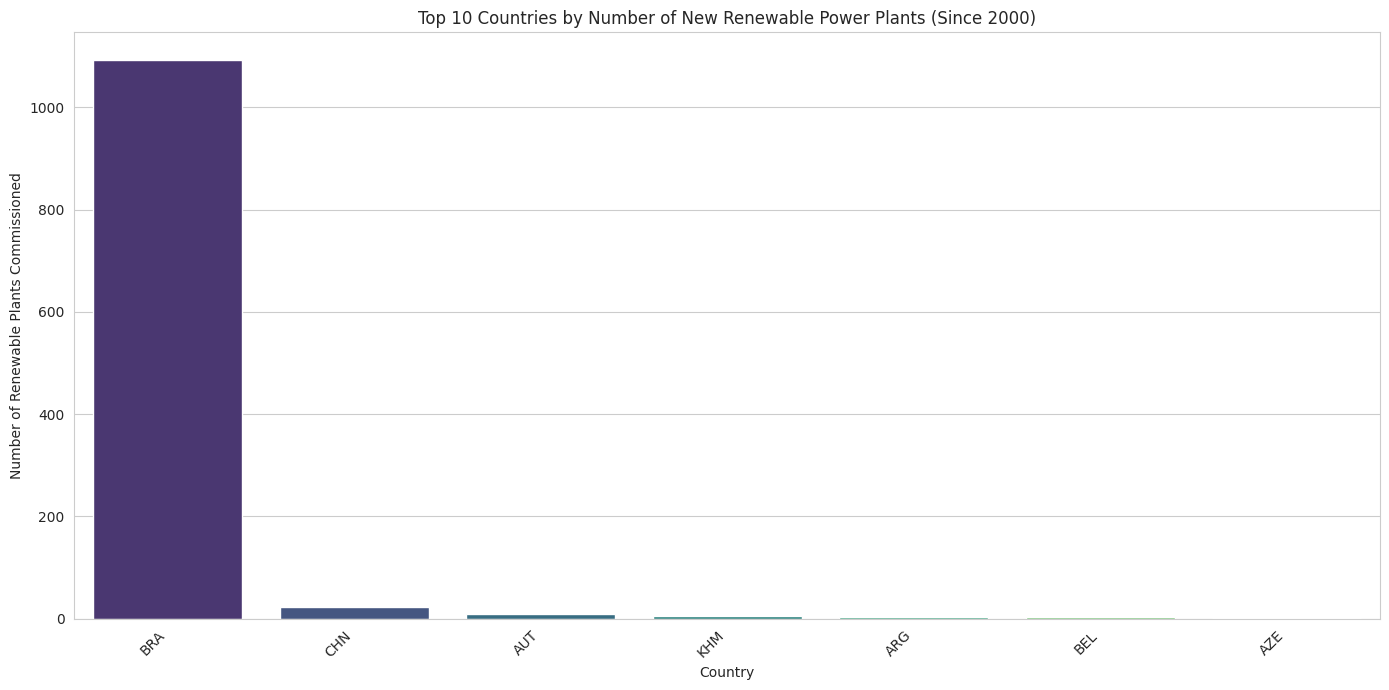

In [27]:
# Filter for renewable power plants
renewable_plants = df_recent[df_recent['source_type'] == 'Renewable']

# Group by country and count the number of renewable plants
country_renewable_counts = renewable_plants['country'].value_counts().reset_index()
country_renewable_counts.columns = ['country', 'renewable_plant_count']

# Select the top N countries (e.g., top 10)
top_n = 10
top_countries_renewable = country_renewable_counts.head(top_n)

print(f"\n--- Top {top_n} Countries by Number of Renewable Power Plants Commissioned (Since 2000) ---")
print(top_countries_renewable)

# Visualize the top countries
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='renewable_plant_count', data=top_countries_renewable, palette='viridis')
plt.title(f'Top {top_n} Countries by Number of New Renewable Power Plants (Since 2000)')
plt.xlabel('Country')
plt.ylabel('Number of Renewable Plants Commissioned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **4.3 Renewable Capacity Contribution by Country**

Beyond just the number of plants, let's look at which countries are adding the most renewable capacity (in MW).


--- Top 10 Countries by Renewable Power Plant Capacity (MW) Commissioned (Since 2000) ---
  country  renewable_capacity_mw
4     BRA            33274.97172
5     CHN             3747.60000
6     KHM              715.00000
3     BEL              637.60000
1     AUT              510.00000
0     ARG              300.00000
2     AZE              151.00000


/tmp/ipython-input-3953723693.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='renewable_capacity_mw', data=top_countries_capacity, palette='viridis')


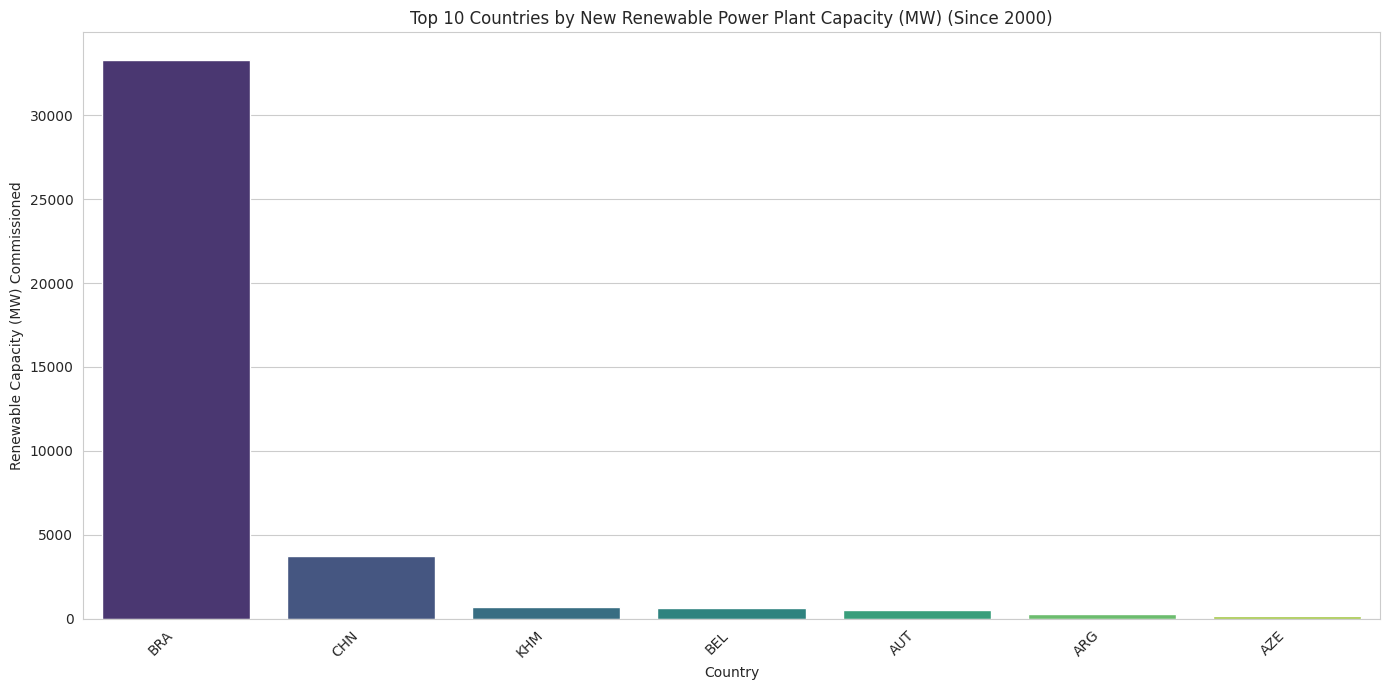

In [28]:
# Filter for renewable power plants
renewable_plants = df_recent[df_recent['source_type'] == 'Renewable']

# Group by country and sum the capacity of renewable plants
country_renewable_capacity = renewable_plants.groupby('country')['capacity_mw'].sum().reset_index()
country_renewable_capacity.columns = ['country', 'renewable_capacity_mw']

# Select the top N countries by capacity
top_countries_capacity = country_renewable_capacity.sort_values(by='renewable_capacity_mw', ascending=False).head(top_n)

print(f"\n--- Top {top_n} Countries by Renewable Power Plant Capacity (MW) Commissioned (Since 2000) ---")
print(top_countries_capacity)

# Visualize the top countries by capacity
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='renewable_capacity_mw', data=top_countries_capacity, palette='viridis')
plt.title(f'Top {top_n} Countries by New Renewable Power Plant Capacity (MW) (Since 2000)')
plt.xlabel('Country')
plt.ylabel('Renewable Capacity (MW) Commissioned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **4.4 Proportion of Renewable Capacity within Top Countries**

For the top countries in terms of total commissioned capacity (renewable and non-renewable), let's examine the proportion of renewable capacity.


--- Top 10 Countries by Total Power Plant Capacity Commissioned (Since 2000) and their Renewable Percentage ---
   country  total_capacity_mw  renewable_capacity_mw  \
10     CHN        57270.00000             3747.60000   
8      BRA        45102.89732            33274.97172   
11     DZA         2621.00000                0.00000   
0      ARG         2066.14000              300.00000   
4      BEL         1465.60000              637.60000   
5      BGD         1428.00000                0.00000   
3      AZE         1313.00000              151.00000   
2      AUT         1092.00000              510.00000   
9      CAN         1078.00000                0.00000   
12     KHM         1064.20000              715.00000   

    renewable_capacity_percentage  
10                       6.543740  
8                       73.775686  
11                       0.000000  
0                       14.519829  
4                       43.504367  
5                        0.000000  
3                 

/tmp/ipython-input-2877385940.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='renewable_capacity_percentage', data=top_countries_overall_capacity, palette='viridis')


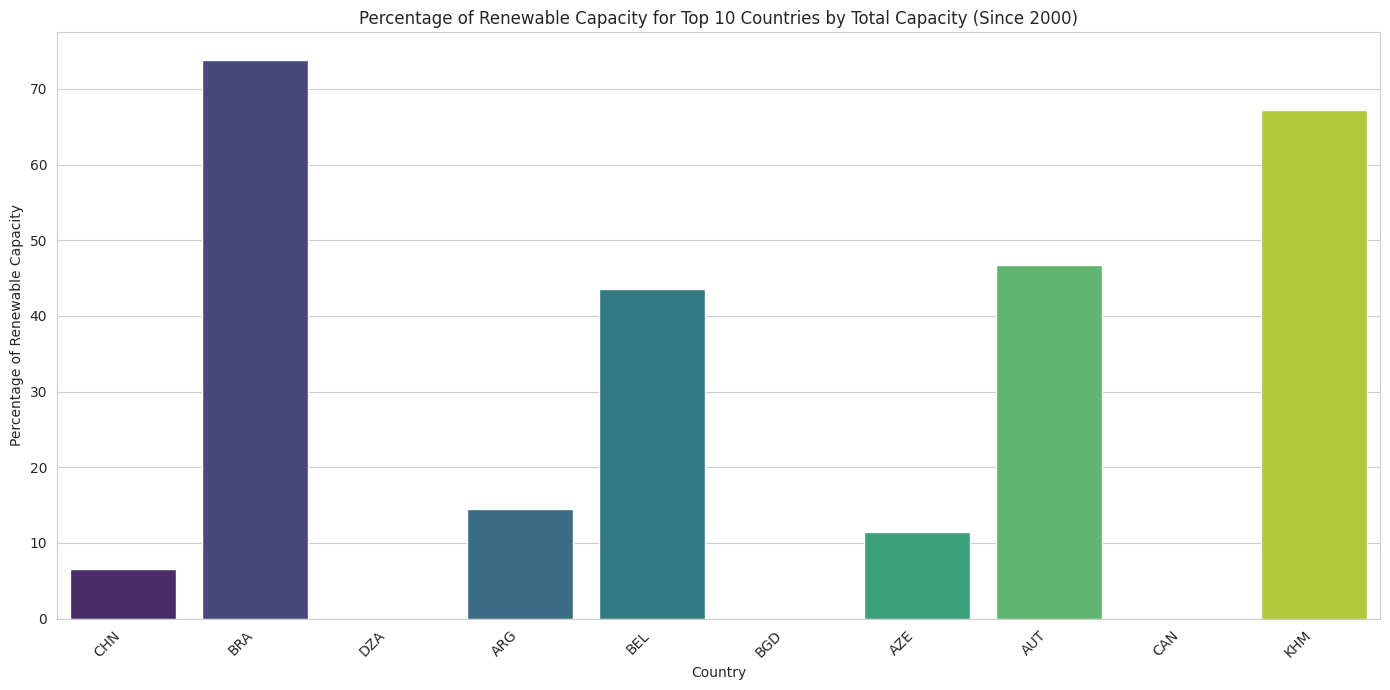

In [29]:
# Filter for renewable power plants
renewable_plants = df_recent[df_recent['source_type'] == 'Renewable']

# Group by country and sum total capacity
country_total_capacity = df_recent.groupby('country')['capacity_mw'].sum().reset_index()
country_total_capacity.columns = ['country', 'total_capacity_mw']

# Merge total capacity with renewable capacity
country_capacity_comparison = pd.merge(country_total_capacity, country_renewable_capacity, on='country', how='left').fillna(0)

# Calculate the percentage of renewable capacity
country_capacity_comparison['renewable_capacity_percentage'] = (country_capacity_comparison['renewable_capacity_mw'] / country_capacity_comparison['total_capacity_mw']) * 100

# Select the top N countries by total capacity
top_countries_overall_capacity = country_capacity_comparison.sort_values(by='total_capacity_mw', ascending=False).head(top_n)

print(f"\n--- Top {top_n} Countries by Total Power Plant Capacity Commissioned (Since 2000) and their Renewable Percentage ---")
print(top_countries_overall_capacity)

# Visualize the renewable capacity percentage for the top countries (by total capacity)
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='renewable_capacity_percentage', data=top_countries_overall_capacity, palette='viridis')
plt.title(f'Percentage of Renewable Capacity for Top {top_n} Countries by Total Capacity (Since 2000)')
plt.xlabel('Country')
plt.ylabel('Percentage of Renewable Capacity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **4.5 Distribution of Primary Fuel Types for New Power Plants**

Let's examine the distribution of primary fuel types for power plants commissioned since 2000 to see which fuel sources are most common.


--- Distribution of Primary Fuel Types for New Power Plants (Since 2000) ---
primary_fuel
Hydro      461
Oil        445
Wind       413
Coal       286
Biomass    263
Gas        146
Waste       11
Solar        3
Other        2
Nuclear      2
Name: count, dtype: int64


/tmp/ipython-input-673552144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts.index, y=primary_fuel_counts.values, palette='viridis')


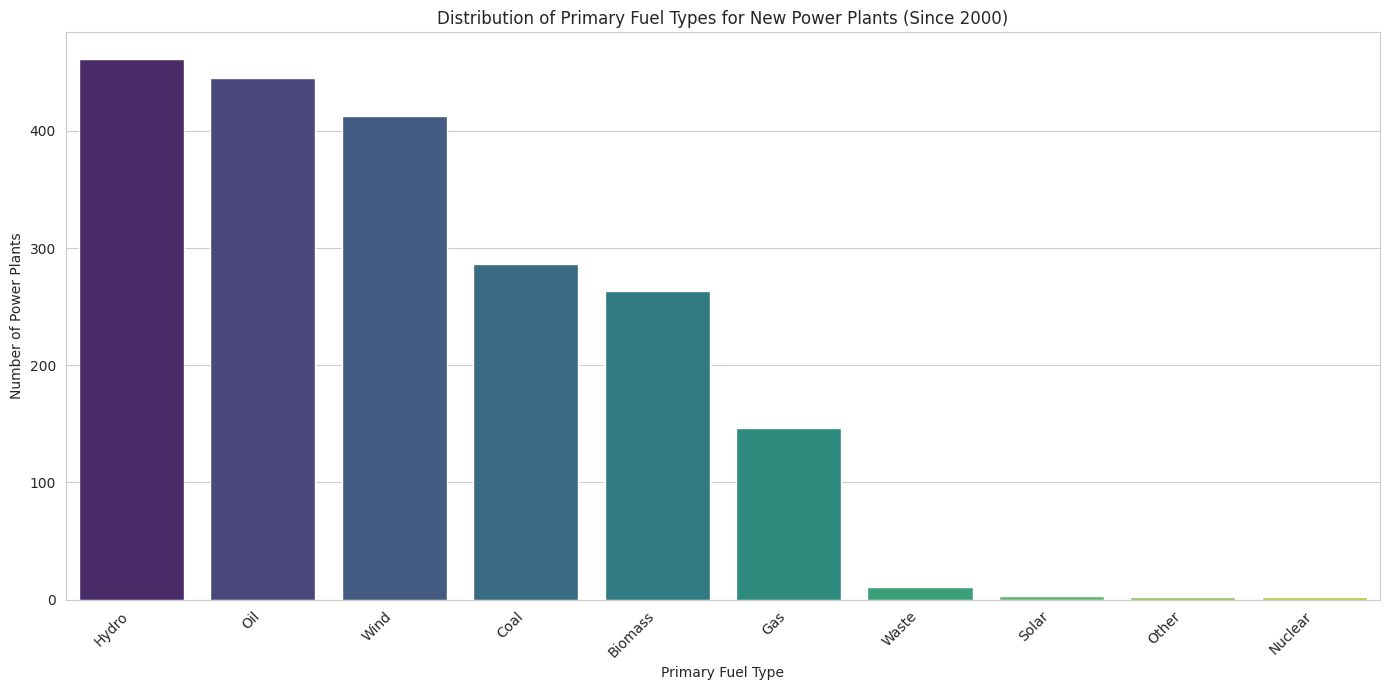

In [30]:
# Analyze the distribution of primary fuel types for new power plants (since 2000)
primary_fuel_counts = df_recent['primary_fuel'].value_counts()

print("\n--- Distribution of Primary Fuel Types for New Power Plants (Since 2000) ---")
print(primary_fuel_counts)

# Visualize the distribution of primary fuel types
plt.figure(figsize=(14, 7))
sns.barplot(x=primary_fuel_counts.index, y=primary_fuel_counts.values, palette='viridis')
plt.title('Distribution of Primary Fuel Types for New Power Plants (Since 2000)')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **4.6 Visualization of Renewable vs. Non-Renewable Capacity Over Time**

Let's visualize the total commissioned capacity (in MW) for both renewable and non-renewable power plants over time to see the trend in capacity additions.

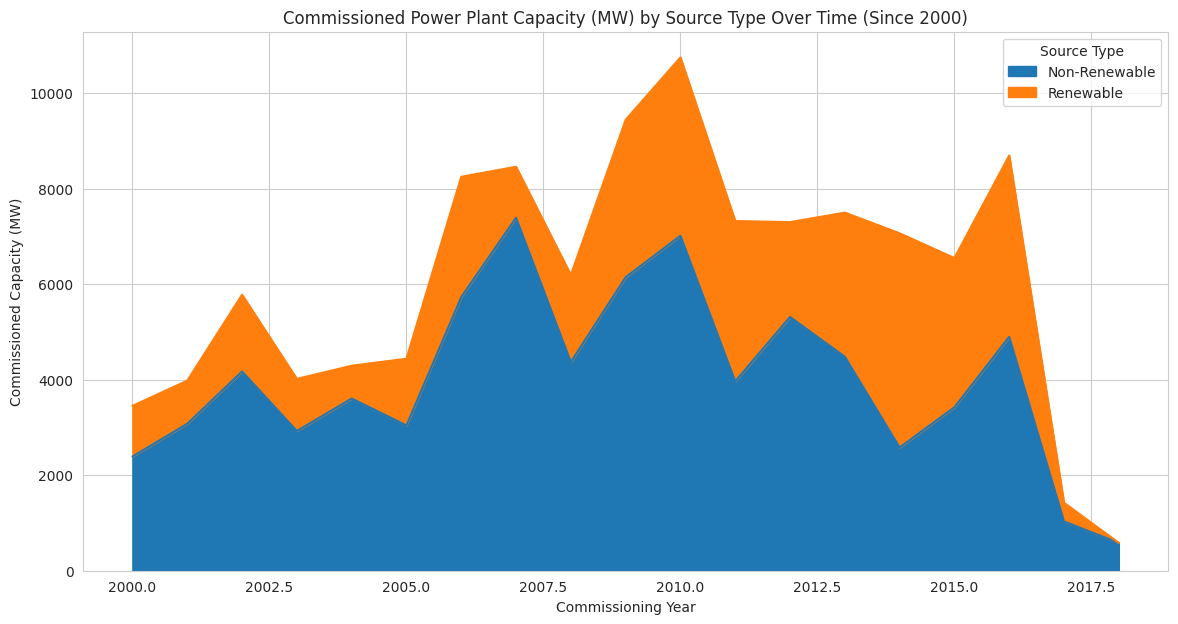

In [31]:
# Group by commissioning year and source type to sum the capacity
yearly_capacity = df_recent.groupby(['commissioning_year', 'source_type'])['capacity_mw'].sum().unstack(fill_value=0)

# Plot the stacked area chart of commissioned capacity over time
plt.figure(figsize=(14, 7))
yearly_capacity.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Commissioned Power Plant Capacity (MW) by Source Type Over Time (Since 2000)')
plt.xlabel('Commissioning Year')
plt.ylabel('Commissioned Capacity (MW)')
plt.legend(title='Source Type')
plt.grid(True)
plt.show()

#### **4.7 Map Visualization of Power Plants by Source Type**

Let's visualize the geographical distribution of power plants, colored by their source type (Renewable or Non-Renewable), to see spatial patterns.

In [32]:
# Install folium for interactive mapping
!pip install folium

import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the mean latitude and longitude of the data
map_center = [df_recent['latitude'].mean(), df_recent['longitude'].mean()]
power_plant_map = folium.Map(location=map_center, zoom_start=2)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(power_plant_map)

# Define colors for renewable and non-renewable plants
color_map = {'Renewable': 'green', 'Non-Renewable': 'red'}

# Add markers for each power plant
for index, row in df_recent.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color_map[row['source_type']],
        fill=True,
        fill_color=color_map[row['source_type']],
        fill_opacity=0.6,
        tooltip=f"Plant: {row['name']}<br>Fuel: {row['primary_fuel']}<br>Capacity: {row['capacity_mw']} MW"
    ).add_to(marker_cluster)

# Display the map
power_plant_map

## Deeper dive into specific fuel types


Analyze trends and distributions for specific renewable fuel types (e.g., Solar, Wind, Hydro).


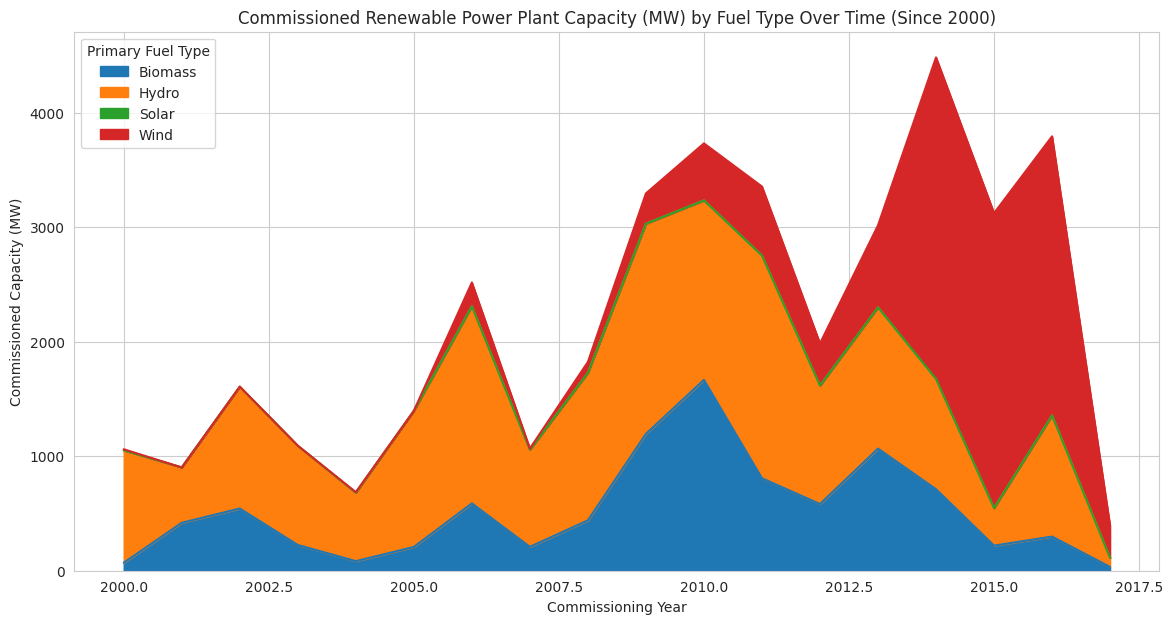

/tmp/ipython-input-3765410793.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_renewable_capacity_by_fuel.index, y=total_renewable_capacity_by_fuel.values, palette='viridis')


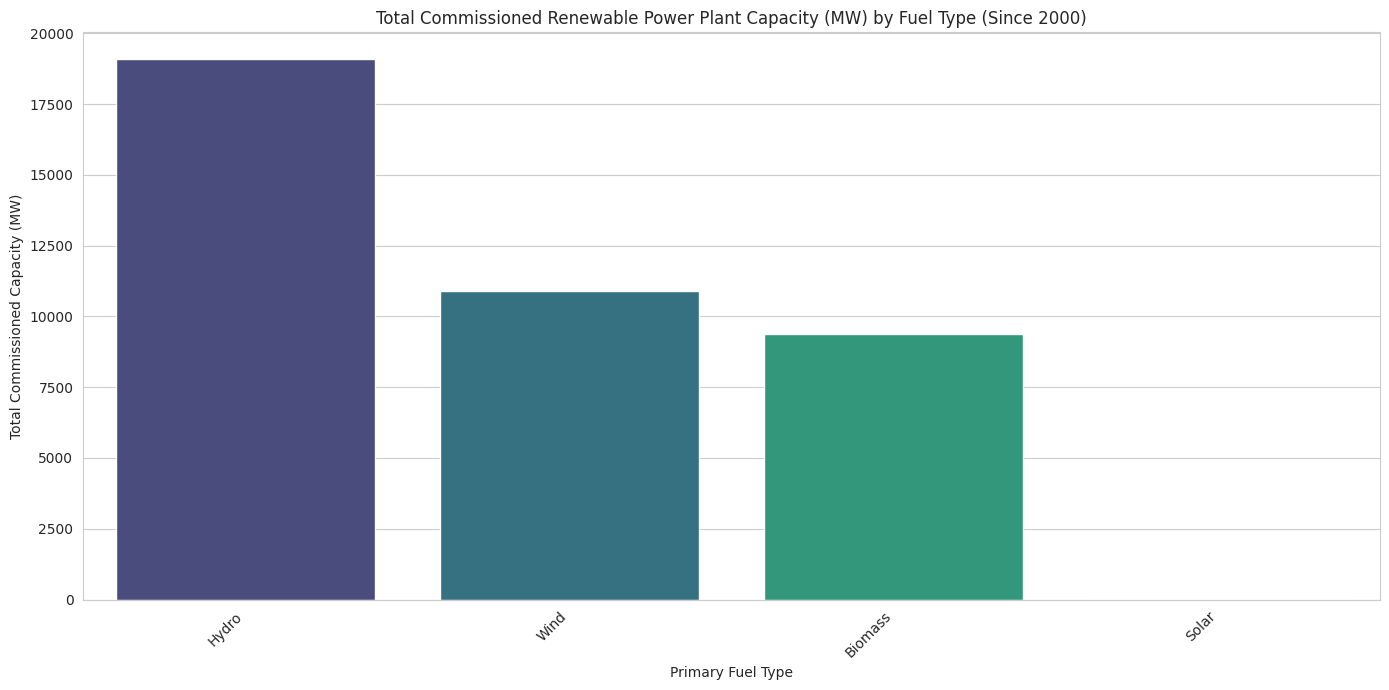

In [33]:
# 1. Filter the df_recent DataFrame to include only renewable power plants.
renewable_plants_recent = df_recent[df_recent['source_type'] == 'Renewable'].copy()

# 2. Group the filtered DataFrame by commissioning_year and primary_fuel, summing the capacity_mw for each group.
# 3. Unstack the resulting DataFrame to have years as the index and primary fuel types as columns. Fill any missing values with 0.
yearly_renewable_capacity_by_fuel = renewable_plants_recent.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().unstack(fill_value=0)

# 4. Plot a stacked area chart of the commissioned capacity over time for each renewable fuel type.
plt.figure(figsize=(14, 7))
yearly_renewable_capacity_by_fuel.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Commissioned Renewable Power Plant Capacity (MW) by Fuel Type Over Time (Since 2000)')
plt.xlabel('Commissioning Year')
plt.ylabel('Commissioned Capacity (MW)')
plt.legend(title='Primary Fuel Type')
plt.grid(True)
plt.show()

# 5. Plot a bar chart showing the total commissioned capacity for each renewable fuel type across all years since 2000.
total_renewable_capacity_by_fuel = renewable_plants_recent.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=total_renewable_capacity_by_fuel.index, y=total_renewable_capacity_by_fuel.values, palette='viridis')
plt.title('Total Commissioned Renewable Power Plant Capacity (MW) by Fuel Type (Since 2000)')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Total Commissioned Capacity (MW)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Geospatial analysis


Perform more advanced geospatial analysis on the distribution of power plants, potentially identifying clusters or relationships with geographical factors.


In [34]:
# Create a new Folium map centered on the mean latitude and longitude of the df_recent DataFrame
map_center = [df_recent['latitude'].mean(), df_recent['longitude'].mean()]
power_plant_map_fuel = folium.Map(location=map_center, zoom_start=2)

# Add a MarkerCluster layer to the map to group nearby markers
marker_cluster_fuel = MarkerCluster().add_to(power_plant_map_fuel)

# Define colors for different primary fuel types
primary_fuel_colors = {
    'Hydro': 'blue',
    'Oil': 'black',
    'Wind': 'cyan',
    'Coal': 'gray',
    'Biomass': 'green',
    'Gas': 'orange',
    'Waste': 'purple',
    'Solar': 'yellow',
    'Other': 'brown',
    'Nuclear': 'magenta'
}

# Iterate through each row of the df_recent DataFrame and add markers
for index, row in df_recent.iterrows():
    fuel_color = primary_fuel_colors.get(row['primary_fuel'], 'gray') # Default to gray if fuel type not in map
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=fuel_color,
        fill=True,
        fill_color=fuel_color,
        fill_opacity=0.6,
        tooltip=f"Plant: {row['name']}<br>Fuel: {row['primary_fuel']}<br>Capacity: {row['capacity_mw']} MW"
    ).add_to(marker_cluster_fuel)

# Display the Folium map object
power_plant_map_fuel

## Detailed country analysis


Create dedicated analyses or visualizations for the top countries identified in the initial EDA.


/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


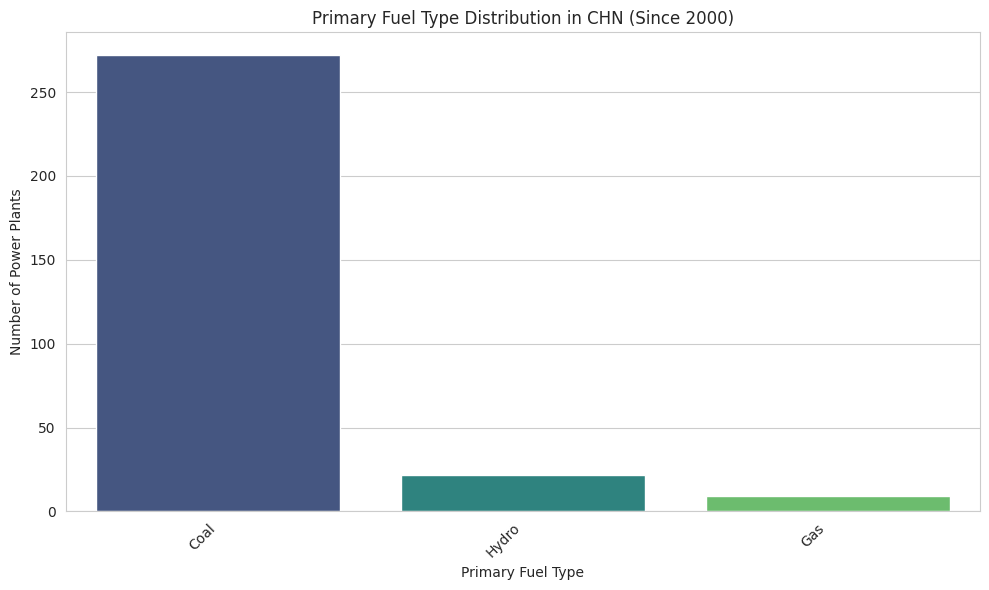

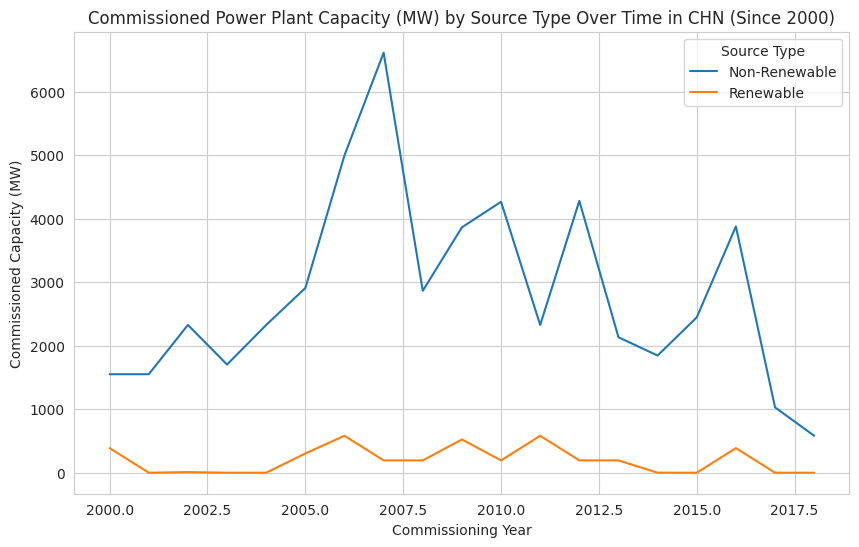

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


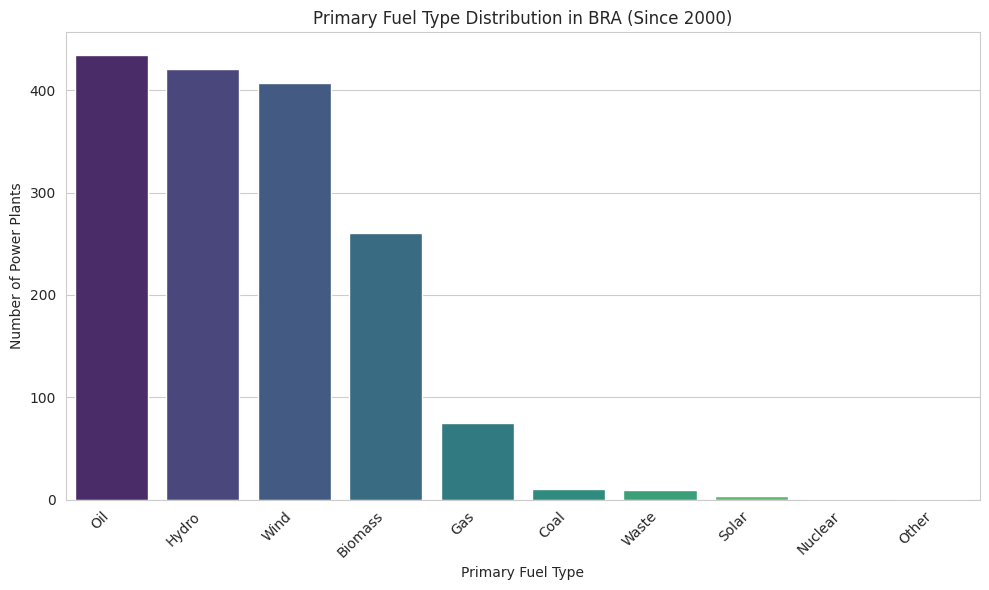

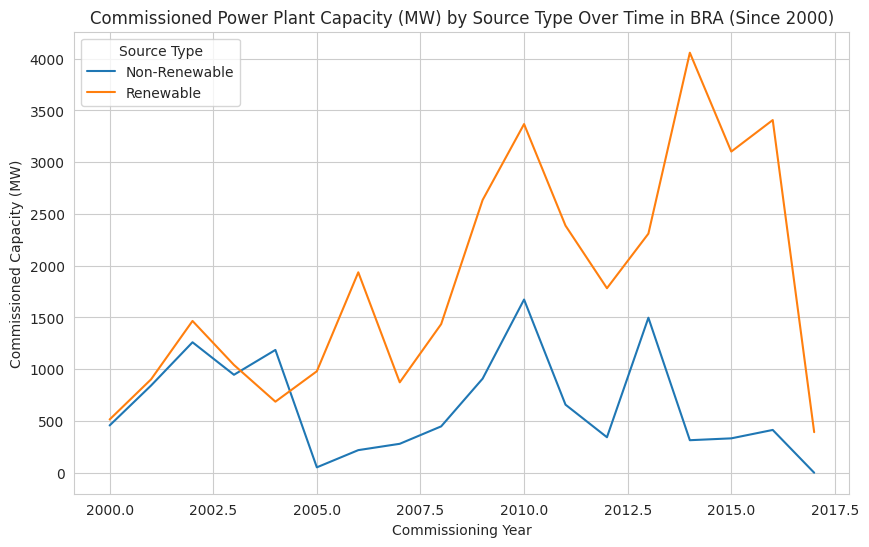

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


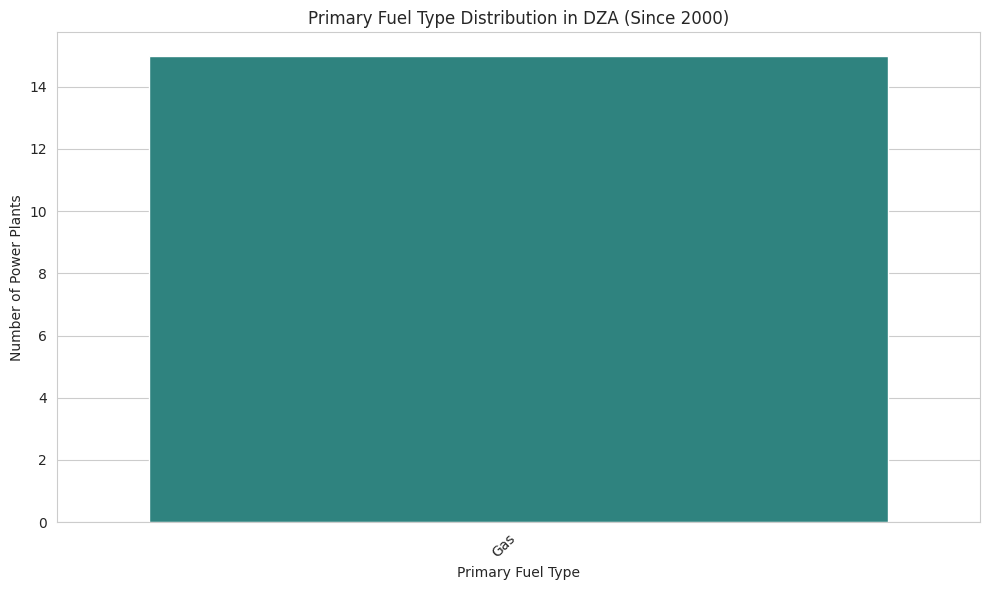

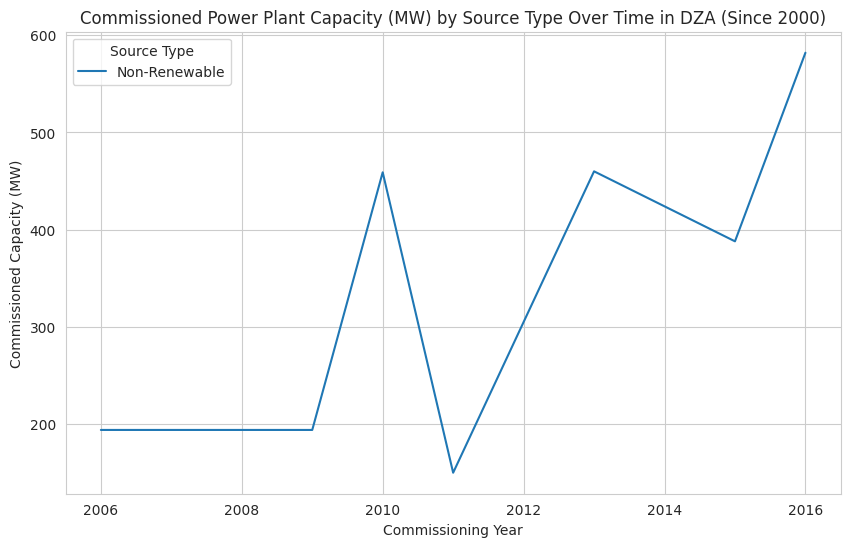

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


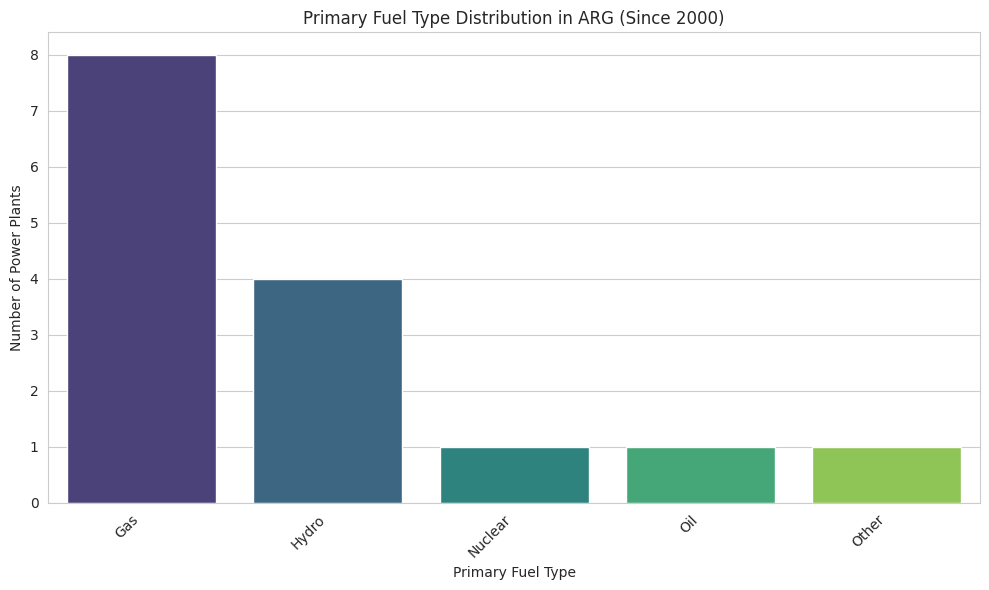

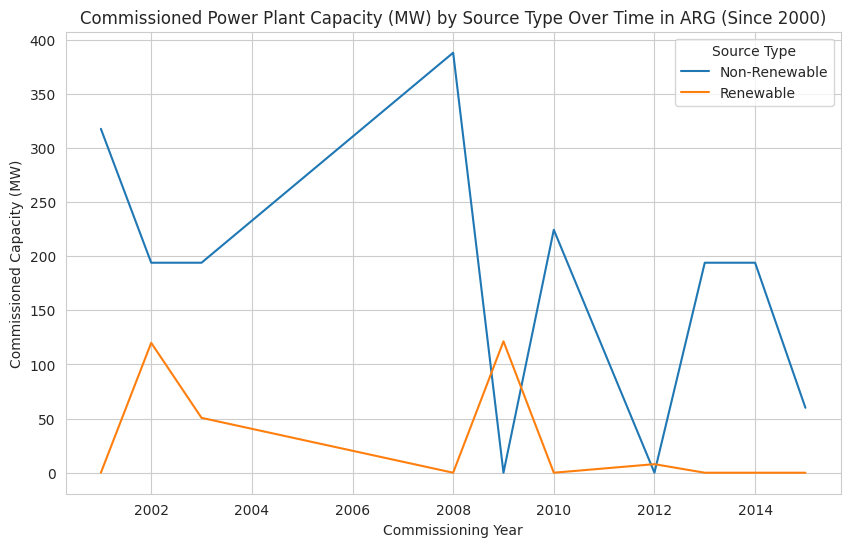

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


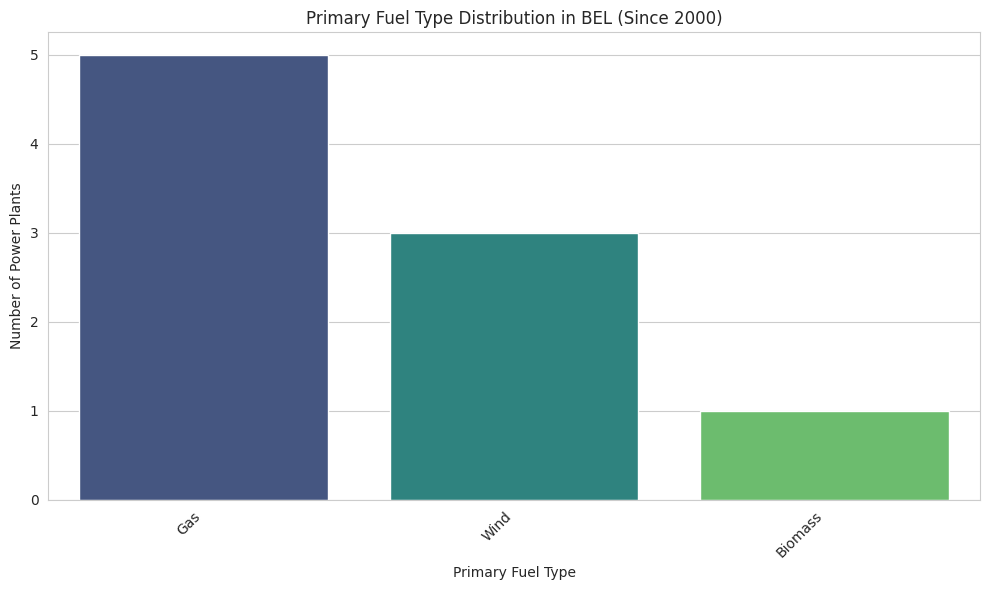

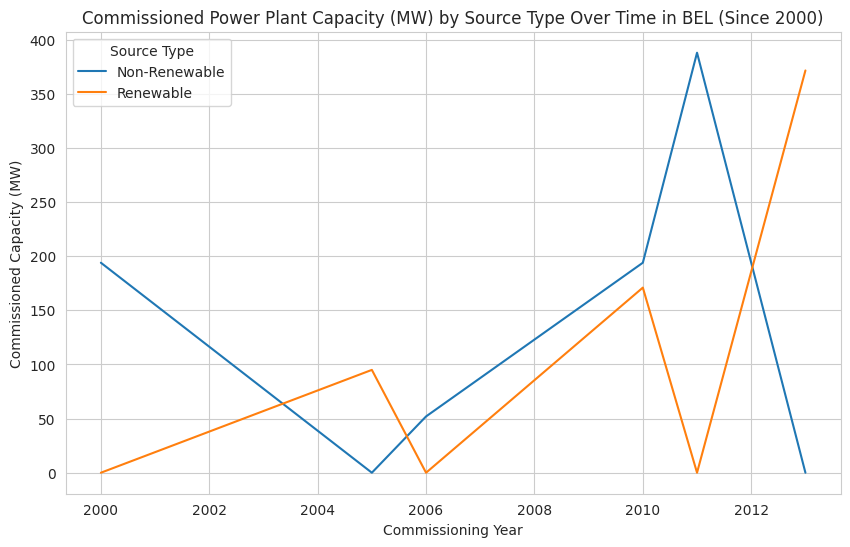

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


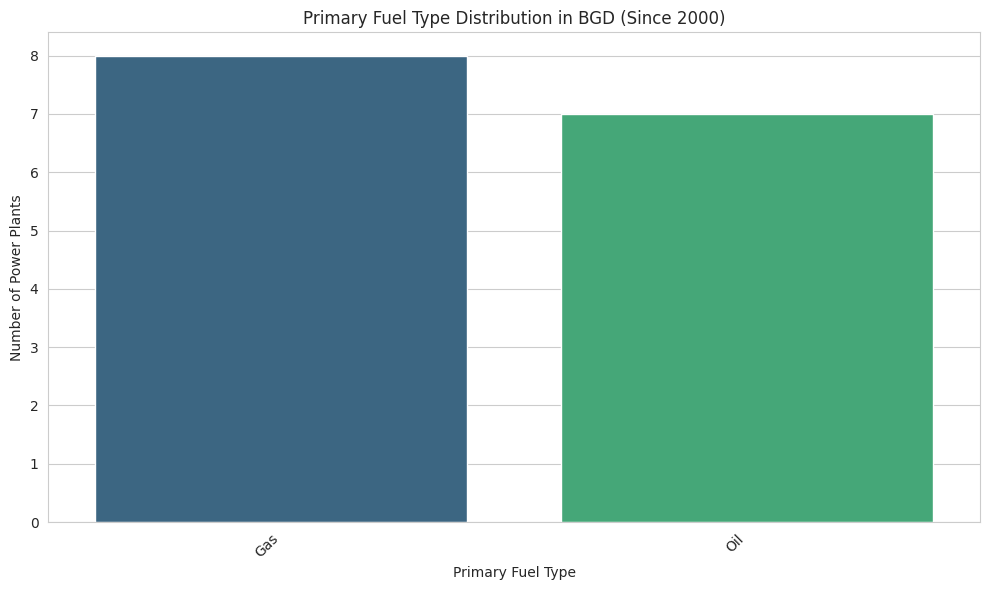

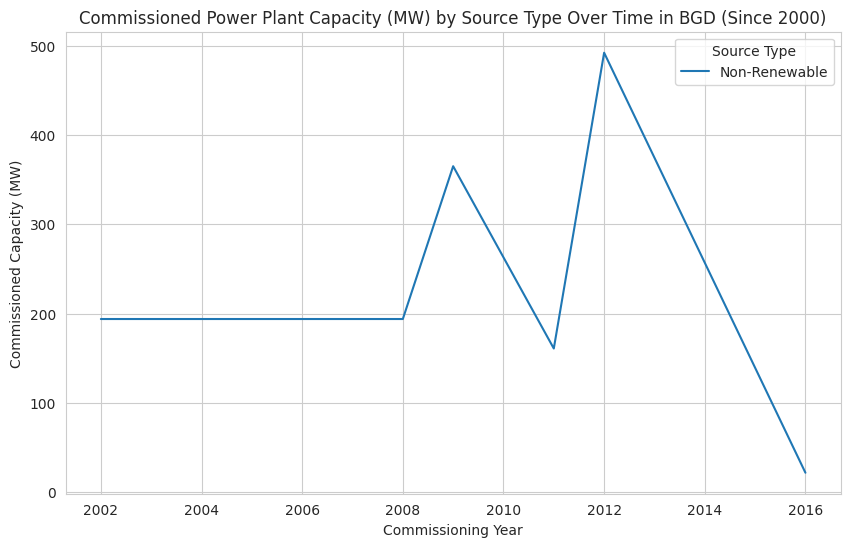

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


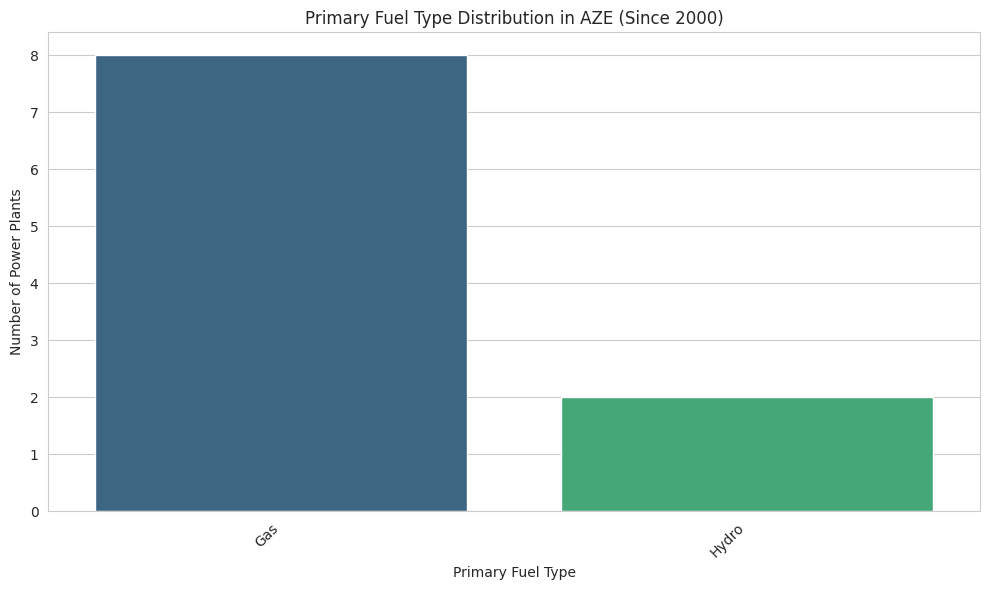

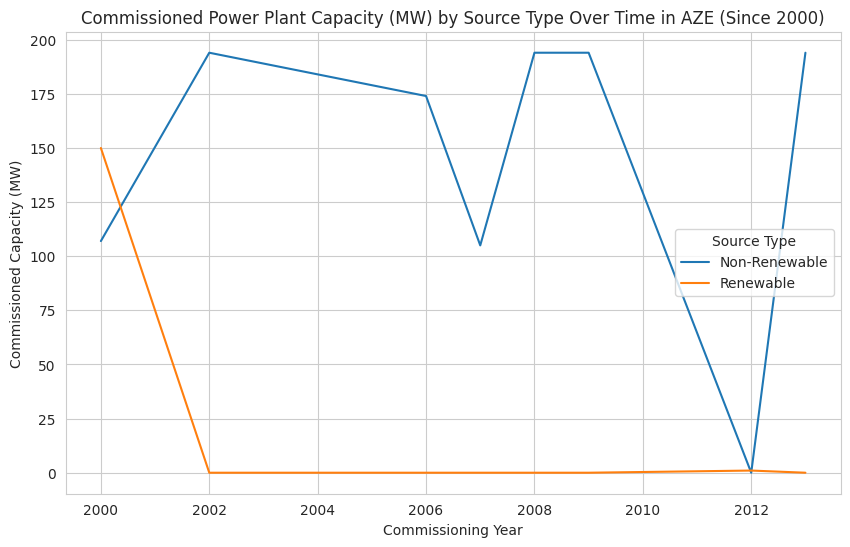

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


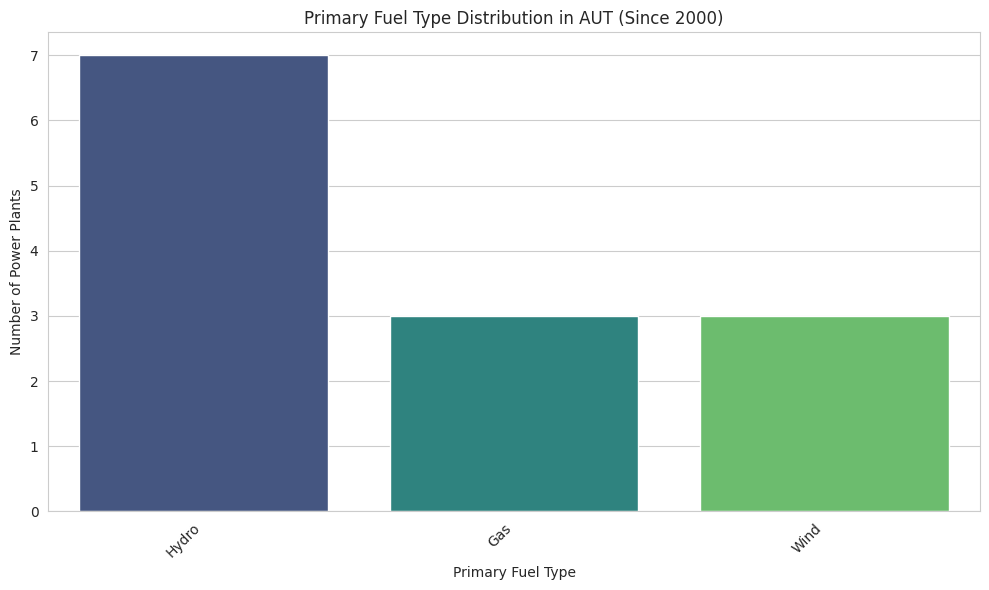

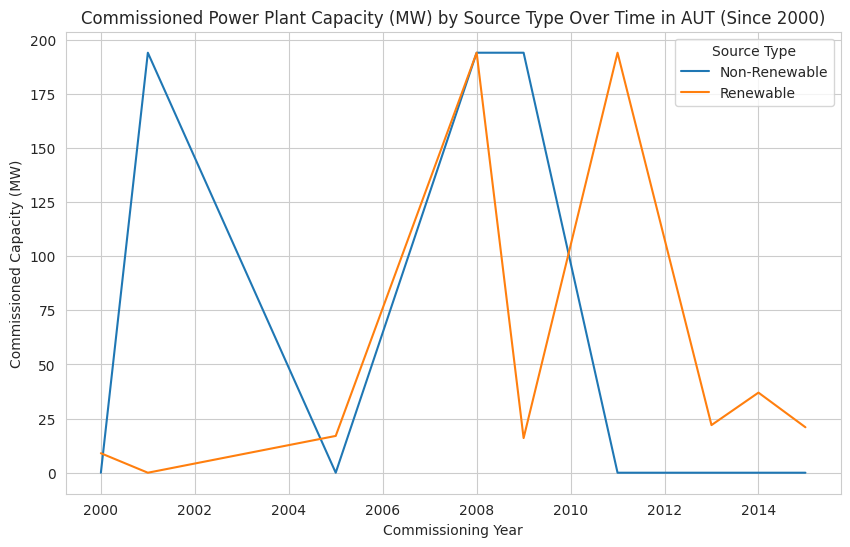

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


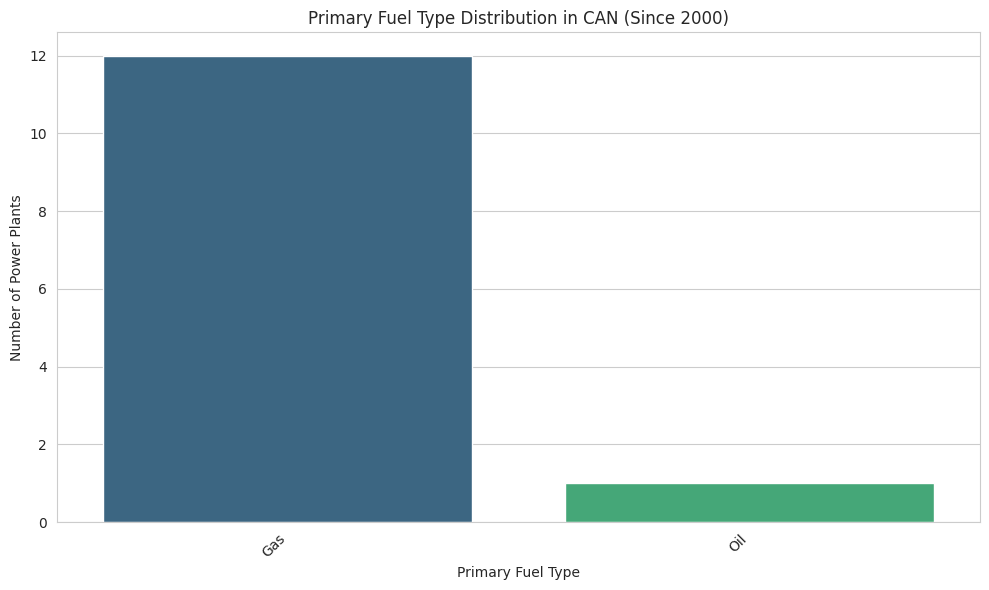

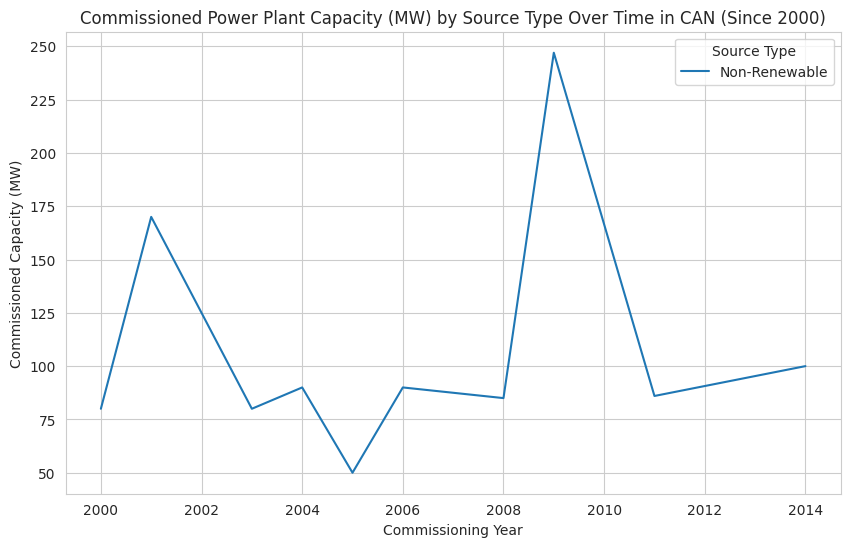

/tmp/ipython-input-4019574398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')


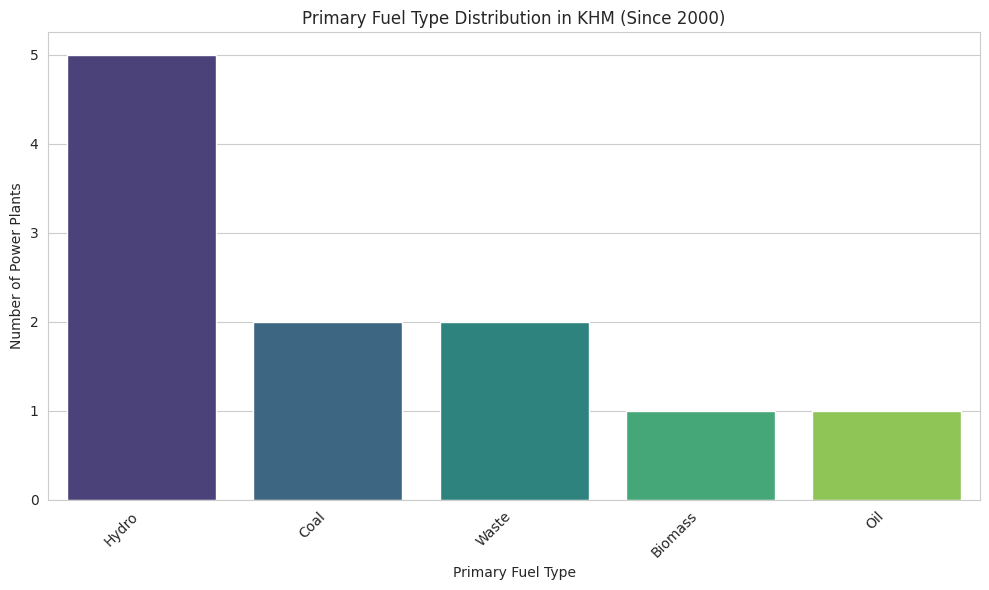

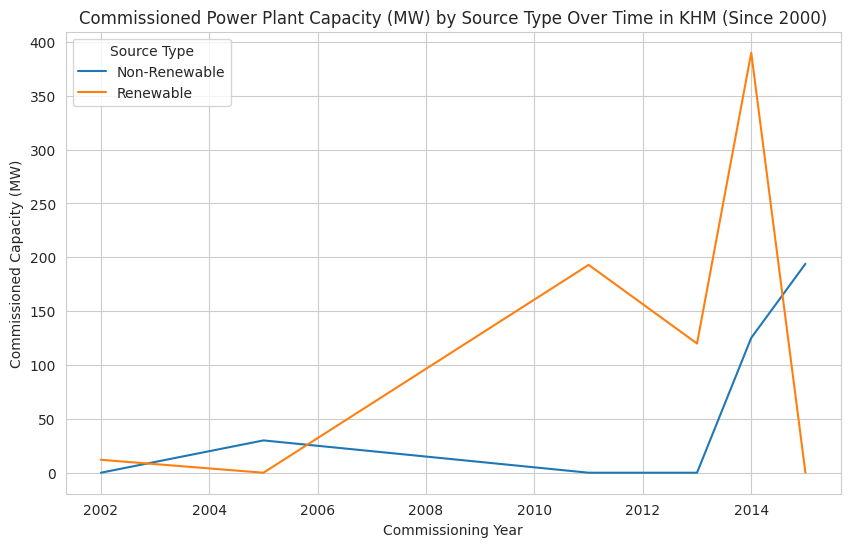

In [36]:
# Get the top 5 countries by total capacity
top_5_countries = top_countries_overall_capacity['country'].tolist()

# Filter the DataFrame to include only data for the top 5 countries
df_top_countries = df_recent[df_recent['country'].isin(top_5_countries)].copy()

# For each of these top countries, create a bar plot showing the distribution of primary fuel types
for country in top_5_countries:
    df_country = df_top_countries[df_top_countries['country'] == country]
    primary_fuel_counts_country = df_country['primary_fuel'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=primary_fuel_counts_country.index, y=primary_fuel_counts_country.values, palette='viridis')
    plt.title(f'Primary Fuel Type Distribution in {country} (Since 2000)')
    plt.xlabel('Primary Fuel Type')
    plt.ylabel('Number of Power Plants')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # For each of these top countries, create a line plot showing the trend of commissioned capacity over time by source type
    yearly_capacity_country = df_country.groupby(['commissioning_year', 'source_type'])['capacity_mw'].sum().unstack(fill_value=0)

    plt.figure(figsize=(10, 6))
    yearly_capacity_country.plot(kind='line', ax=plt.gca())
    plt.title(f'Commissioned Power Plant Capacity (MW) by Source Type Over Time in {country} (Since 2000)')
    plt.xlabel('Commissioning Year')
    plt.ylabel('Commissioned Capacity (MW)')
    plt.legend(title='Source Type')
    plt.grid(True)
    plt.show()

## Summary:

* Are new power plants worldwide becoming more renewable?
Based on the analysis, there is a significant increase in renewable capacity commissioned since 2000, particularly in recent years, suggesting a global trend towards more renewable power plants.
* Which countries are leading this change?
The analysis included a detailed examination of the top countries by total commissioned capacity, revealing the distribution of primary fuel types and the trend of commissioned capacity over time by source type within these leading nations. Based on the analysis of renewable capacity and the proportion of renewable capacity among the top countries by total capacity, **Brazil (BRA)** and **China (CHN)** stand out as leading countries in terms of total commissioned renewable capacity, while countries like **Brazil (BRA)**, **Cambodia (KHM)**, and **Austria (AUT)** show a high percentage of renewable capacity within their total commissioned capacity since 2000.

### Data Analysis Key Findings

* Since 2000, there has been a significant increase in commissioned renewable power plant capacity globally.
* Solar and Wind power have shown particularly rapid acceleration in terms of commissioned capacity among renewable fuel types since 2000.

* Detailed analysis of the top countries by total commissioned capacity reveals the specific fuel mix and the trend of renewable vs. non-renewable capacity growth within these leading nations.